#### Imports

In [1]:
#We are obtaining the bayesian networks from https://www.bnlearn.com/bnrepository

from pgmpy.readwrite import BIFReader
from pgmpy.inference import VariableElimination
import random
from asvFormula.bayesianNetworks.bayesianNetwork import *
from asvFormula.bayesianNetworks import networkSamplesPath
from asvFormula.datasetManipulation import *

### Create the network and the dataset

In [ ]:
random.seed(10)

cancerNetworkPath = networkSamplesPath + "/cancer.bif"
#cancerNetworkPath = networkSamplesPath + "/cancer_tree.bif"

BNmodel = BIFReader(cancerNetworkPath).get_model()
BNInference = VariableElimination(BNmodel)

In [ ]:
variableToPredict = "Pollution"

# Create a BNDatabaseGenerator object from the model
dataFromBN = datasetFromBayesianNetwork(BNmodel, 2000)
valuesPerFeature, encodedDataset = encodeCategoricalColumns(dataFromBN)
dtTreeClassifier = decisionTreeFromDataset(encodedDataset, variableToPredict , 2)


  0%|          | 0/5 [00:00<?, ?it/s]

The model accuracy is : 0.8975


In [ ]:
BNInference.query(variables=['Cancer']).values
query = BNInference.query(evidence={'Pollution':'high', 'Smoker':'True', 'Cancer' : 'True', 'Dyspnoea' : 'True'}, joint=True, variables = ['Xray'] )
feature = 'Xray'
query.get_value(**{feature :'negative'})

### Student network example

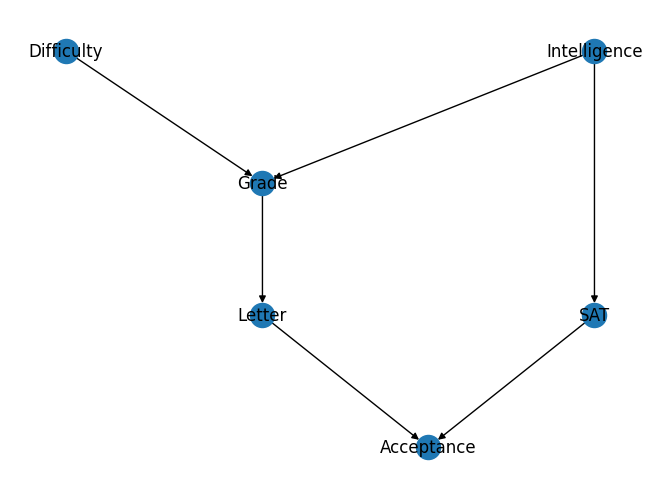

In [ ]:
seed = 10
studentNetworkPath = networkSamplesPath + "/student.bif"

BNmodel = BIFReader(studentNetworkPath).get_model()
BNInference = VariableElimination(BNmodel)

  0%|          | 0/6 [00:00<?, ?it/s]

The model accuracy is : 0.85


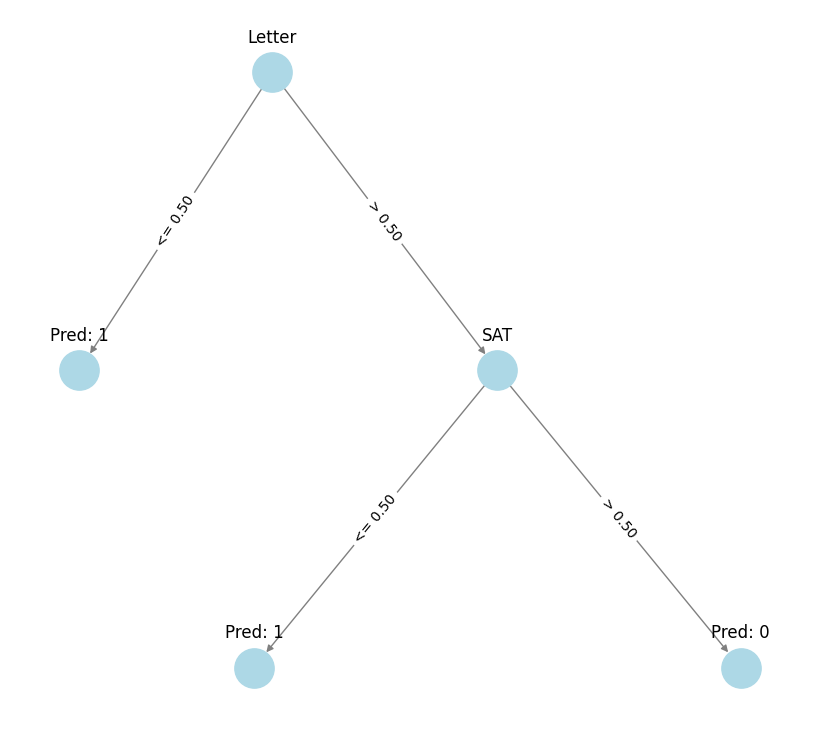

array([1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0])

In [47]:
seed = 15

variableToPredict = "Acceptance"

# Create a BNDatabaseGenerator object from the model
dataFromBN = datasetFromBayesianNetwork(BNmodel, 100, seed)
valuesPerFeature, encodedDataset = encodeCategoricalColumns(dataFromBN)
dtTreeClassifier = decisionTreeFromDataset(encodedDataset, variableToPredict , 2, seed)

modelFeatures = list(encodedDataset.columns)
modelFeatures.remove(variableToPredict)
dtAsNetwork = obtainDecisionTreeDigraph(dtTreeClassifier, modelFeatures)
drawDecisionTree(dtAsNetwork)
dtTreeClassifier.predict(encodedDataset.drop(variableToPredict, axis=1))

In [60]:
#drawDecisionTree(dtAsNetwork)
#print(valuesPerFeature)
#print(encodedDataset['Acceptance'].value_counts())
#print(dataFromBN['Acceptance'].value_counts())
#drawDecisionTree(dtAsNetwork)
print(meanPredictionForDTinBN(dtTreeClassifier, BNInference, valuesPerFeature, variableToPredict, {"Intelligence" : 1},  ['Intelligence']))
query = BNInference.query(evidence={'Intelligence':'i1'}, joint=True, variables = ['Letter', 'SAT'] )
print(query.get_value(**{'Letter' : 'l1', 'SAT' : 's1'}))

#print(BNInference.query(joint=True, variables = ['Acceptance'] ))
#print(valuesPerFeature)

[0.614176 0.385824]
0.614176
